# About the dataset
This contains data of news headlines published over a period of 15 years. From the reputable Australian news source ABC (Australian Broadcasting Corp.)
Site: http://www.abc.net.au/
Prepared by Rohit Kulkarni


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [4]:
data = pd.read_csv("./abcnews-date-text(1).csv",error_bad_lines=False,usecols =["headline_text"])
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [5]:
data.to_csv('abcnews.csv', index=False, encoding='utf8')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 1 columns):
headline_text    1226258 non-null object
dtypes: object(1)
memory usage: 9.4+ MB


# Deleting dupliate headlines(if any)

In [7]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
57967,10 killed in pakistan bus crash
116298,10 killed in pakistan bus crash
676423,110 with barry nicholls
672958,110 with barry nicholls
911080,110 with barry nicholls
748629,110 with barry nicholls
826828,110 with barry nicholls episode 15
897042,110 with barry nicholls episode 15


In [8]:
data = data.drop_duplicates('headline_text')

# NLP 

# Preparing data for vectorizaion
However, when doing natural language processing, words must be converted into vectors that machine learning algorithms can make use of. If your goal is to do machine learning on text data, like movie reviews or tweets or anything else, you need to convert the text data into numbers. This process is sometimes referred to as “embedding” or “vectorization”.

In terms of vectorization, it is important to remember that it isn’t merely turning a single word into a single number. While words can be transformed into numbers, an entire document can be translated into a vector. Not only can a vector have more than one dimension, but with text data vectors are usually high-dimensional. This is because each dimension of your feature data will correspond to a word, and the language in the documents you are examining will have thousands of words.

# TF-IDF
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes; 83% of text-based recommender systems in the domain of digital libraries use tf-idf.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [9]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [10]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

104399
['afpa', 'afpla', 'afps', 'afr', 'afraid', 'afrcia', 'afresh', 'afri', 'afric', 'africa', 'african', 'africans', 'africanus', 'africas', 'africaspotted', 'africulture', 'afrid', 'afridi', 'afrikaners', 'afrin', 'afro', 'aft', 'aftaid', 'afte', 'after15', 'afterabseiling', 'afterbirth', 'aftercompany', 'afterdark', 'afterfavourites', 'afterglow', 'afterlife', 'aftermarket', 'aftermath', 'afternoon', 'afternoons', 'afterparty', 'afterpay', 'afterschool', 'aftershock', 'aftershocks', 'aftertaste', 'afterthought', 'afterwoman', 'afterwork', 'aftr', 'aftrica', 'afw', 'afwl', 'ag', 'aga', 'agai', 'againon', 'agains', 'againsthim', 'againt', 'againts', 'agaisnt', 'agalarov', 'aganst', 'aganstwawrinka', 'agant', 'agapanthus', 'agape', 'agar', 'agarkar', 'agars', 'agarwal', 'agassi', 'agassis', 'agata', 'agatha', 'agave', 'agc', 'agca', 'agchatoz', 'agconnectwa', 'agd', 'agdata', 'age', 'agea', 'agebt', 'aged', 'agein', 'ageing', 'ageings', 'ageism', 'ageist', 'ageless', 'agels', 'agen',

# Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

# Tokenizing
Tokenization is breaking the sentence into words and punctuation,

In [11]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [12]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


72395
["'a", "'i", "'s", "'x", 'aa', 'aaa', 'aaahhh', 'aac', 'aacc', 'aaco', 'aacta', 'aad', 'aadhaar', 'aadmi', 'aag', 'aagaard', 'aagard', 'aah', 'aalto', 'aam', 'aamer', 'aami', 'aamodt', 'aandahl', 'aant', 'aap', 'aapa', 'aapt', 'aar', 'aaradhna', 'aardman', 'aardvark', 'aargau', 'aaron', 'aaronpaul', 'aarwun', 'aat', 'ab', 'aba', 'abaaoud', 'ababa', 'aback', 'abacus', 'abadi', 'abadon', 'abal', 'abalon', 'abalonv', 'abama', 'abandon']


In [13]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


For this, we will use k-means clustering algorithm.
# K-means clustering
(Source [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm) )
![http://gdurl.com/5BbP](http://gdurl.com/5BbP)"

# Elbow method to select number of clusters
This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)

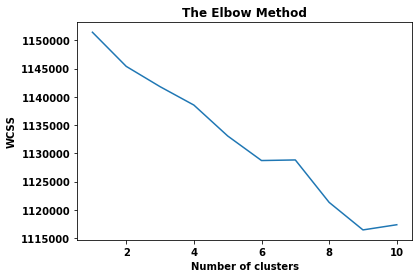

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

As more than one elbows have been generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

In [15]:
print(words[250:300])

['decid', 'decis', 'declar', 'defenc', 'defend', 'delay', 'deliv', 'demand', 'deni', 'despit', 'destroy', 'detent', 'develop', 'die', 'director', 'disabl', 'disast', 'discuss', 'diseas', 'dismiss', 'disput', 'doctor', 'dog', 'dollar', 'domest', 'donald', 'donat', 'doubl', 'doubt', 'draw', 'dri', 'drink', 'drive', 'driver', 'drop', 'drought', 'drown', 'drug', 'drum', 'dump', 'dure', 'eagl', 'earli', 'eas', 'east', 'econom', 'economi', 'edg', 'educ', 'effort']


# 3 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

# 5 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

# 6 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

# 8 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Because even I didn't know what kind of clusters would be generated, I will describe them in comments.